Math 画图测试

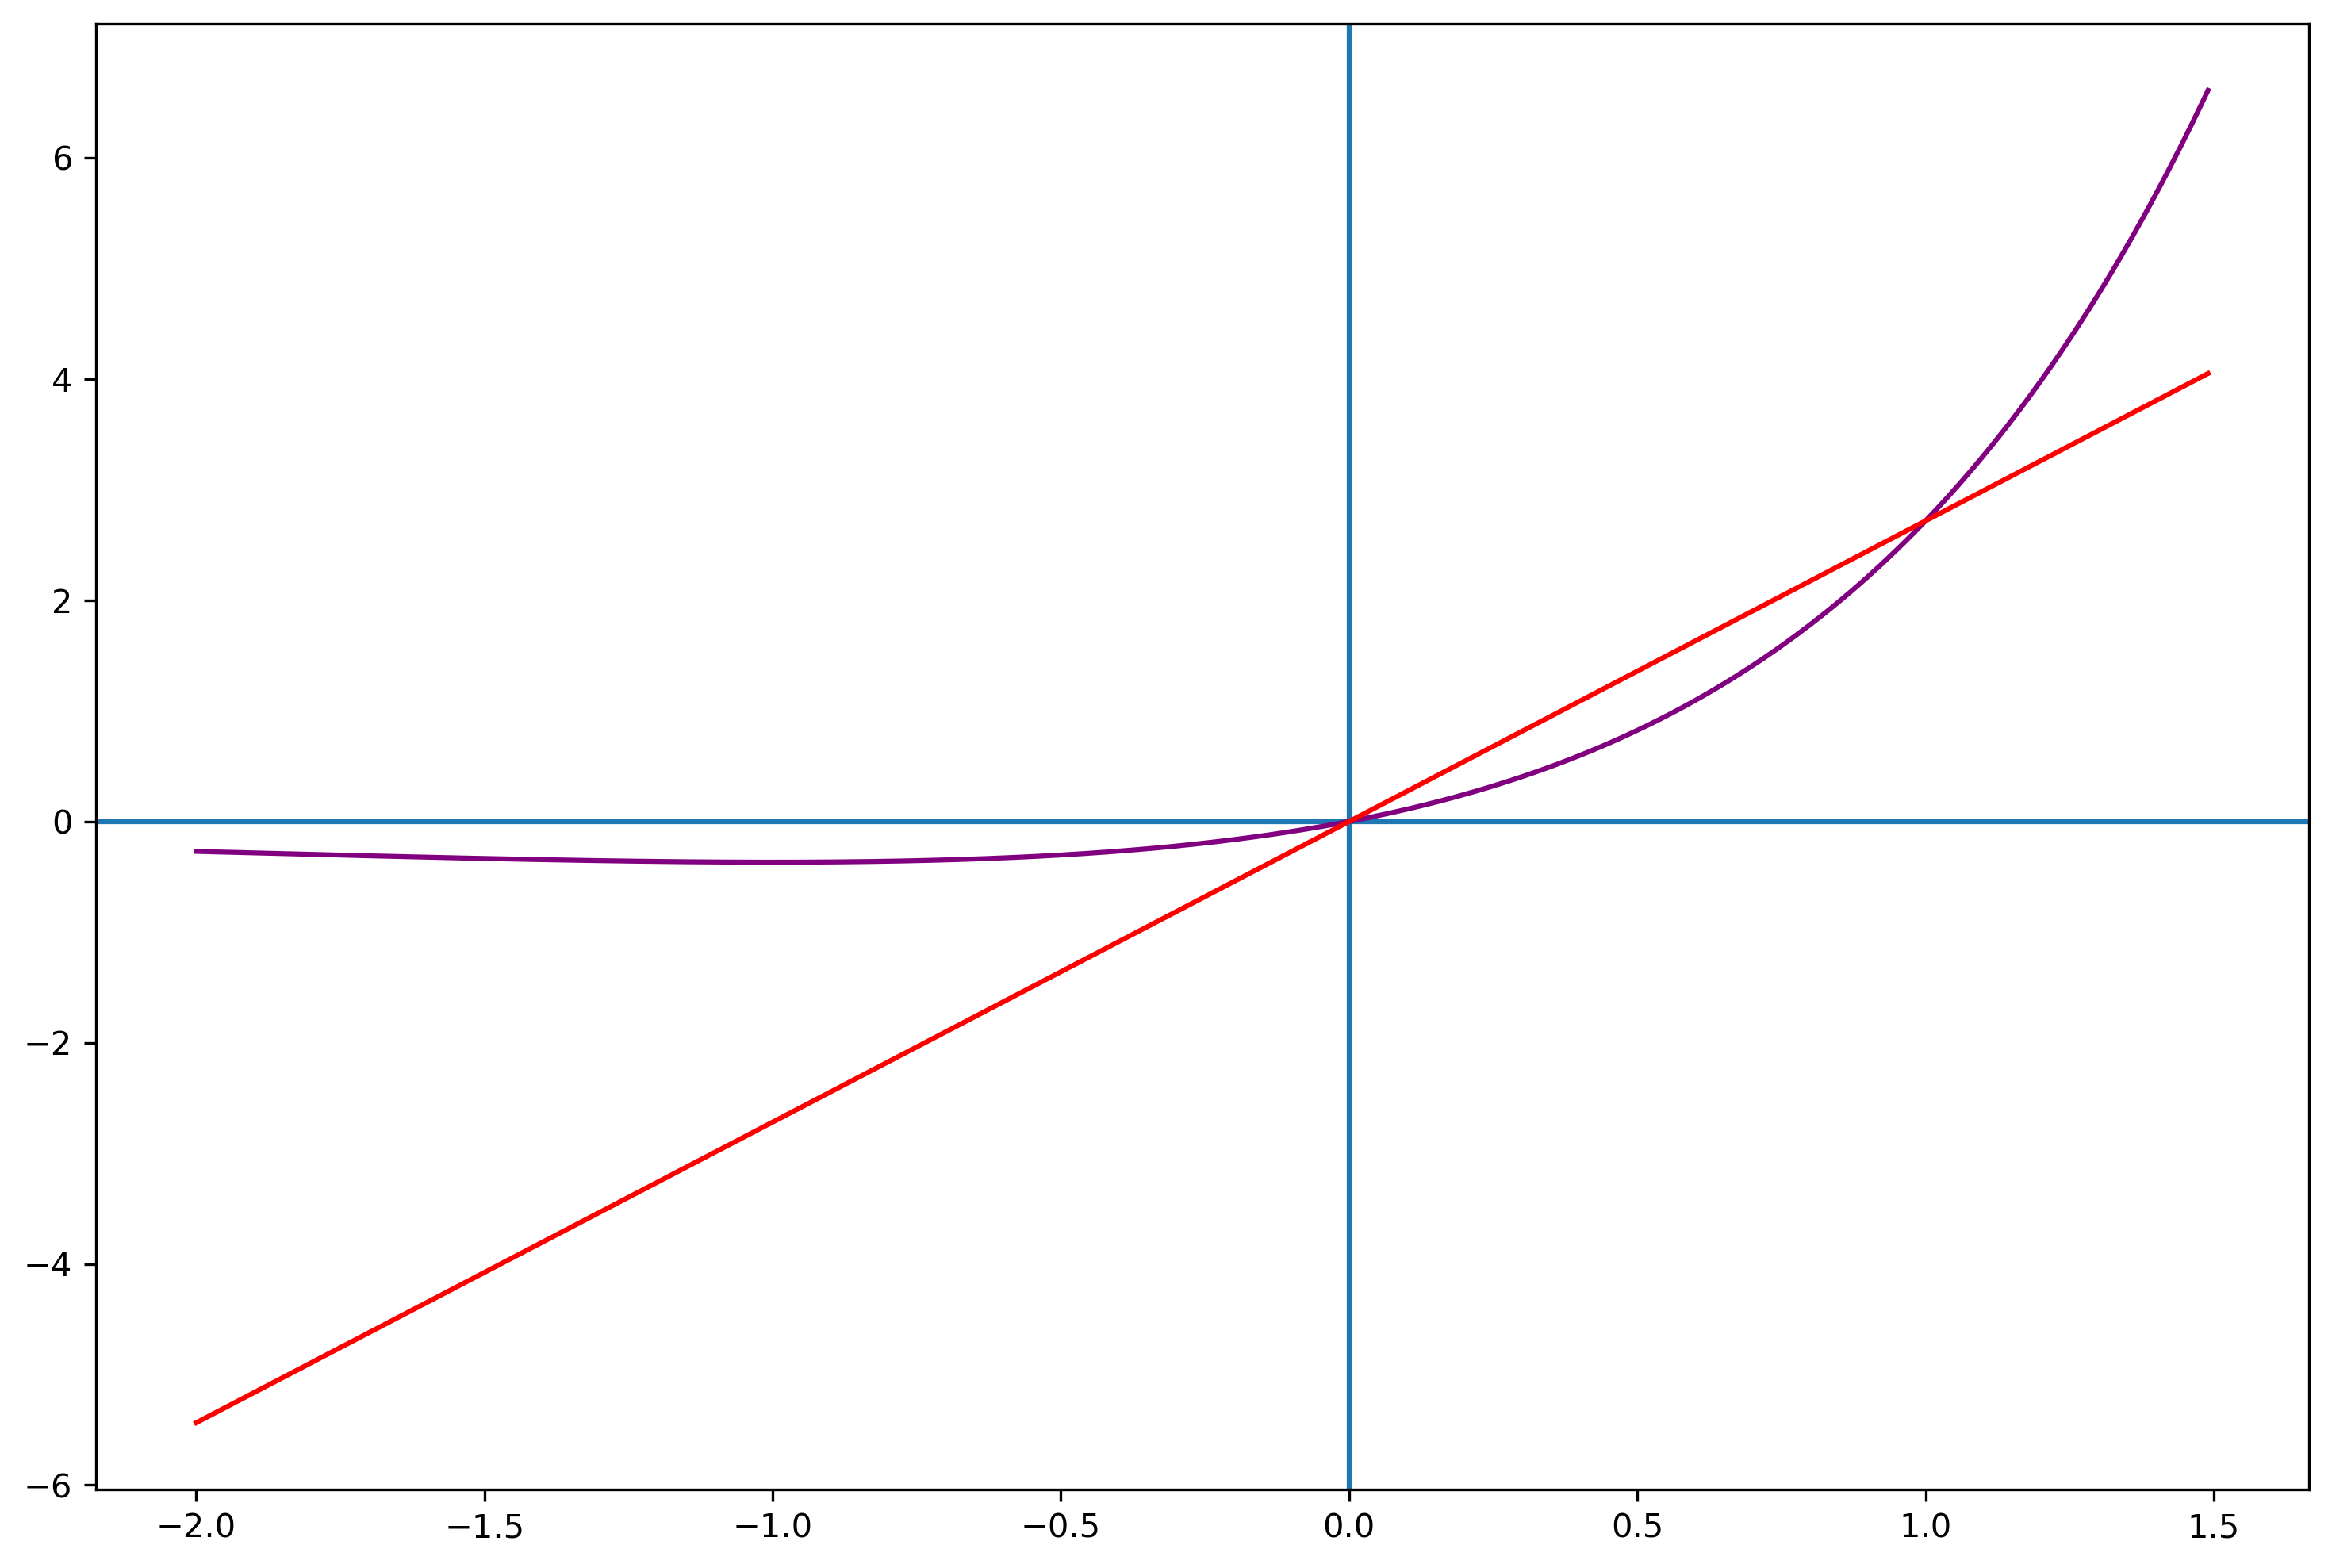

In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np

plt.figure(figsize=(12, 8), dpi=300)

x = np.arange(-2, 1.5, 0.01)
y1 = []
y2 = []
for t in x:
    a = t * math.exp(t)
    y1.append(a)

for t in x:
    a = t * math.exp(1)
    y2.append(a)

plt.axvline(0)
plt.axhline(0)
plt.plot(x, y1, color="purple")
plt.plot(x, y2, color="red")

OpenAI 开源项目 whisper 测试

In [2]:
# /bash  pip install openai-whisper
# import whisper

# model = whisper.load_model("large-v3")

# result = model.transcribe("")

# print(result["text"])

OpenAI python-SDK

In [3]:
from openai import OpenAI

# for backward compatibility, you can still use `https://api.deepseek.com/v1` as `base_url`.
# client = OpenAI(api_key="your_api_key", base_url="https://api.deepseek.com")
# print(client.models.list())

箱型图按边界值平滑

In [4]:
import numpy as np
import pandas as pd
import math

# 要处理的数据
x = np.array([60, 65, 63, 66, 67, 69, 71, 72, 74, 76, 77, 82, 84, 87, 90])
# 对数据排序
x.sort()
# 定义等区间
bins = [60, 70, 80, 90, 100]
# 对数据按区间分段，right=False代表区间左闭右开
x_cuts = pd.cut(x, bins, right=False)
# number数组即为每个区间的数据数量
number = x_cuts.value_counts().values
# 取所有区间中最大的数据数量
rows = number.max()

number

array([6, 5, 3, 1])

In [5]:
# 定义初始化等宽箱
widthList = np.full([4, rows], 0)
size = x.size
# 将要处理的数据x按照等宽分箱法分箱
i = 0
for a in range(0, 4):
    for b in range(0, number[a]):
        widthList[a, b] = x[i]
        i = i + 1
# 划分后的等宽箱，非零值
widthList

array([[60, 63, 65, 66, 67, 69],
       [71, 72, 74, 76, 77,  0],
       [82, 84, 87,  0,  0,  0],
       [90,  0,  0,  0,  0,  0]])

In [6]:
print(widthList, "\n")

# 按平均值平滑，初始化mean_width
mean_width = np.full([4, rows], 0)
# 等宽分箱法、均值平滑技术
for i in range(0, 4):
    for j in range(0, number[i]):
        # 第i行算数平均值
        mean_width[i][j] = int(widthList[i].sum() / number[i])
# 按平均值平滑后的等宽箱
print(mean_width)

[[60 63 65 66 67 69]
 [71 72 74 76 77  0]
 [82 84 87  0  0  0]
 [90  0  0  0  0  0]] 

[[65 65 65 65 65 65]
 [74 74 74 74 74  0]
 [84 84 84  0  0  0]
 [90  0  0  0  0  0]]


In [7]:
print(widthList, "\n")

# 定义等深箱每行左边界
edgeLeft = np.arange(4)
# 定义等深箱每行右边界
edgeRight = np.arange(4)
# 按边界值平滑，初始化edge_width
edge_width = np.full([4, rows], 0)
# 等宽分箱法、边界值平滑技术
# 遍历等宽箱行
for i in range(0, 4):
    # 第i行左边界
    edgeLeft[i] = widthList[i][0]
    # 第i行右边界
    edgeRight[i] = widthList[i][number[i] - 1]
    # 遍历等宽箱列
    for j in range(0, number[i]):
        # 第一列，即左边界
        if j == 0:
            edge_width[i][j] = widthList[i][0]
        # 等深箱最后一列，即右边界
        if j == (number[i] - 1):
            edge_width[i][j] = widthList[i][number[i] - 1]
        else:
            # 判断距离左边界近还是距离右边界近
            if math.pow((edgeLeft[i] - widthList[i][j]), 2) > math.pow(
                (edgeRight[i] - widthList[i][j]), 2
            ):
                print(
                    "row_index ",
                    i,
                    " column_index ",
                    j,
                    " 原始值",
                    widthList[i][j],
                    " 被修改为右边界",
                    edgeRight[i],
                )
                edge_width[i][j] = edgeRight[i]
            else:
                print(
                    "row_index ",
                    i,
                    " column_index ",
                    j,
                    " 原始值",
                    widthList[i][j],
                    " 被修改为左边界",
                    edgeLeft[i],
                )
                edge_width[i][j] = edgeLeft[i]

print(edge_width)

[[60 63 65 66 67 69]
 [71 72 74 76 77  0]
 [82 84 87  0  0  0]
 [90  0  0  0  0  0]] 

row_index  0  column_index  0  原始值 60  被修改为左边界 60
row_index  0  column_index  1  原始值 63  被修改为左边界 60
row_index  0  column_index  2  原始值 65  被修改为右边界 69
row_index  0  column_index  3  原始值 66  被修改为右边界 69
row_index  0  column_index  4  原始值 67  被修改为右边界 69
row_index  1  column_index  0  原始值 71  被修改为左边界 71
row_index  1  column_index  1  原始值 72  被修改为左边界 71
row_index  1  column_index  2  原始值 74  被修改为左边界 71
row_index  1  column_index  3  原始值 76  被修改为右边界 77
row_index  2  column_index  0  原始值 82  被修改为左边界 82
row_index  2  column_index  1  原始值 84  被修改为左边界 82
[[60 60 69 69 69 69]
 [71 71 71 77 77  0]
 [82 82 87  0  0  0]
 [90  0  0  0  0  0]]


使用matplotlib计算并画出两个圆的偏移量

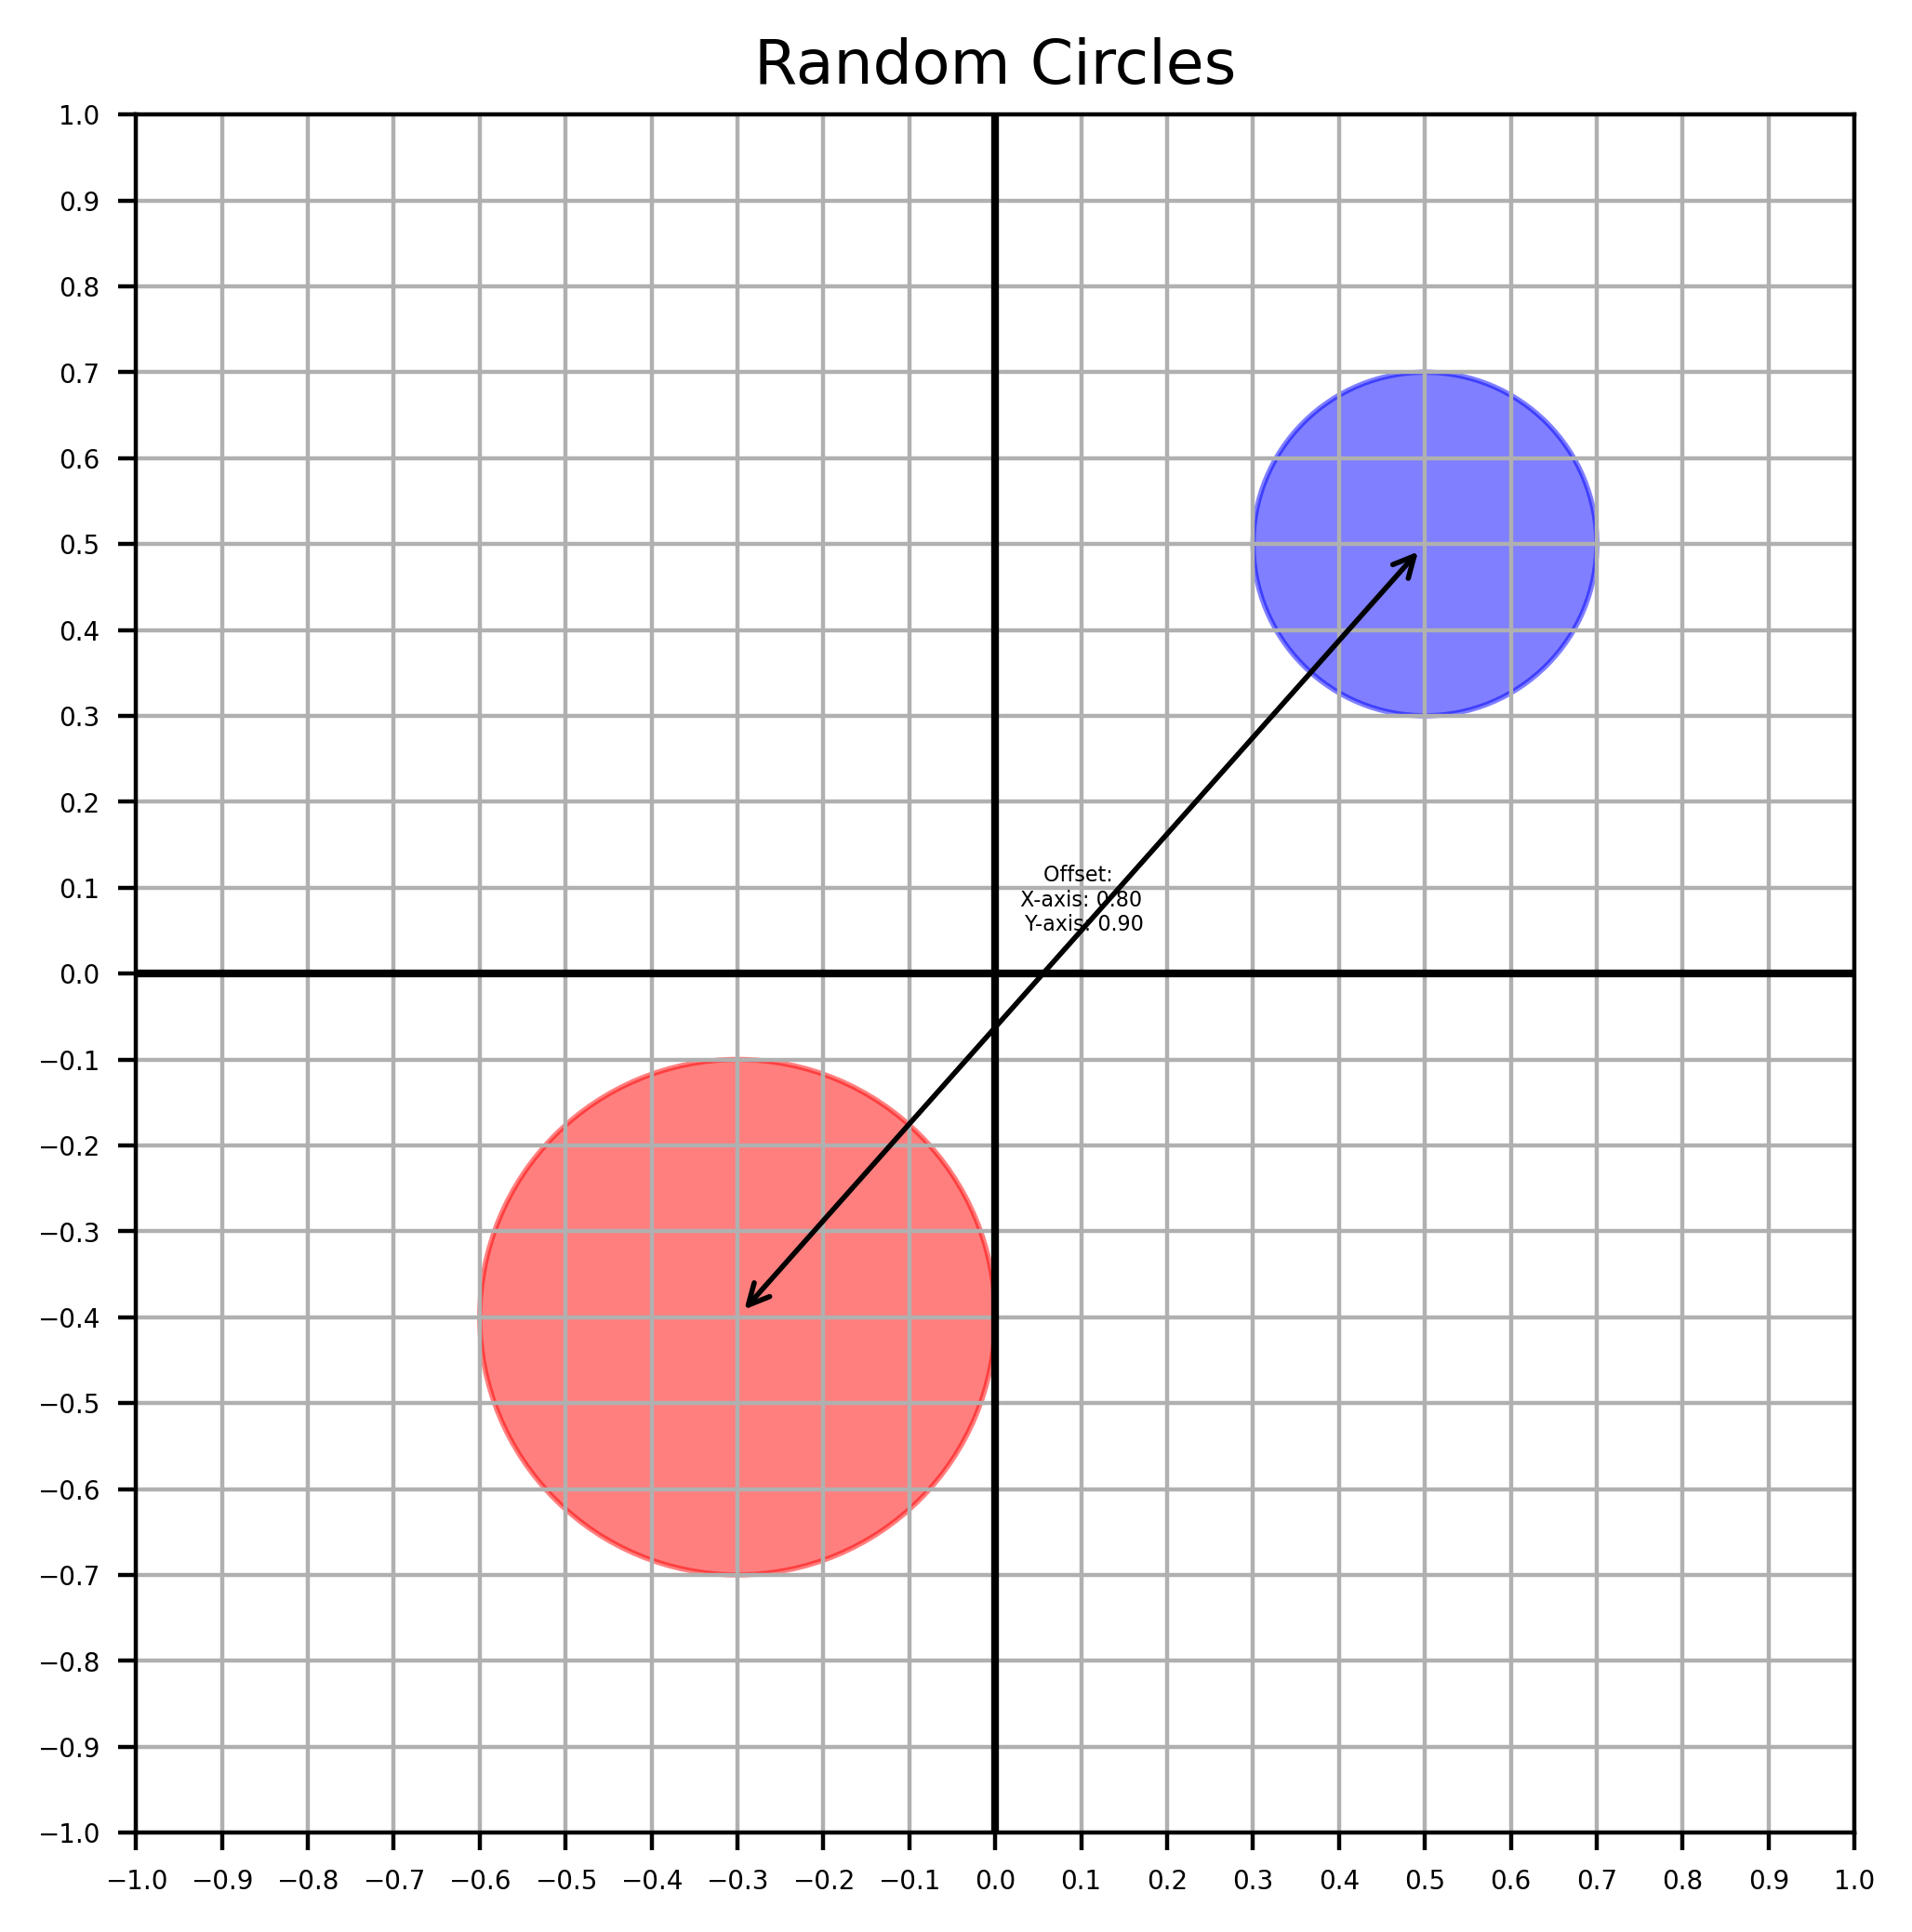

In [8]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import numpy as np

# 设置图形的大小和分辨率（ppi）
fig = plt.figure(figsize=(6, 6), dpi=400)

# 创建坐标轴
ax = fig.add_subplot(111, aspect="equal")

# 绘制坐标轴
ax.axhline(y=0, color="k")  # 绘制水平线
ax.axvline(x=0, color="k")  # 绘制垂直线

# 生成两个随机圆的参数
circle1_center = (0.5, 0.5)
circle1_radius = 0.2
circle1 = Circle(
    circle1_center, circle1_radius, color="blue", alpha=0.5
)  # 圆心为(0.5, 0.5)，半径为0.2，蓝色

circle2_center = (-0.3, -0.4)
circle2_radius = 0.3
circle2 = Circle(
    circle2_center, circle2_radius, color="red", alpha=0.5
)  # 圆心为(-0.3, -0.4)，半径为0.3，红色

# 将圆添加到坐标轴上
ax.add_artist(circle1)
ax.add_artist(circle2)

# 计算圆心之间的偏移量
offset_x = abs(circle1_center[0] - circle2_center[0])
offset_y = abs(circle1_center[1] - circle2_center[1])

# 添加连接线和偏移量标签
arrow_props = dict(facecolor="black", arrowstyle="<->")

# 连接线段
ax.annotate("", xy=circle1_center, xytext=circle2_center, arrowprops=arrow_props)

# 添加偏移量标签
ax.annotate(
    f"Offset: \n X-axis: {offset_x:.2f} \n Y-axis: {offset_y:.2f}",
    xy=(
        (circle1_center[0] + circle2_center[0]) / 2,
        (circle1_center[1] + circle2_center[1]) / 2,
    ),
    ha="center",
    fontsize=4,
)

# 设置坐标轴的范围
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

# 设置显示的刻度
ax.set_xticks(np.linspace(-1, 1, 21))
ax.set_yticks(np.linspace(-1, 1, 21))

# 设置 x 轴和 y 轴刻度的字体大小
ax.tick_params(axis="both",labelsize=5)

# 设置图形标题和显示
ax.set_title("Random Circles")

# 显示网格
ax.grid(True)

# 显示图形
plt.show()

In [9]:
#!/usr/local/bin/env python
import os, sys

try:
    sys.exit(0)
except:
    print('die')
finally:
    print('cleanup')

# try:
#     os._exit(0)
# except:
#     print('die')
# print('os.exit')#不打印直接退出了

die
cleanup
